In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Load data (example: replace with actual data sources)
# Assume data contains columns: origin, destination, migration_flow, pop_i, pop_j, gdp_i, gdp_j, unemp_i, unemp_j, edu_i, edu_j, polstab_i, polstab_j, dist_ij, lang_ij, col_ij
data = pd.read_csv('us_mexico.csv')

# Log-transform variables to linearize the model
data['ln_migration'] = np.log(data['migration_flow'] + 1)  # Add 1 to avoid log(0)
data['ln_pop_i'] = np.log(data['pop_i'])
data['ln_pop_j'] = np.log(data['pop_j'])
data['ln_gdp_i'] = np.log(data['gdp_i'])
data['ln_gdp_j'] = np.log(data['gdp_j'])
data['ln_unemp_i'] = np.log(data['unemp_i'] + 1)
data['ln_unemp_j'] = np.log(data['unemp_j'] + 1)
data['ln_edu_i'] = np.log(data['edu_i'] + 1)
data['ln_edu_j'] = np.log(data['edu_j'] + 1)
data['ln_polstab_i'] = np.log(data['polstab_i'] + 1)
data['ln_polstab_j'] = np.log(data['polstab_j'] + 1)
data['ln_dist_ij'] = np.log(data['dist_ij'])
data['ln_lang_ij'] = np.log(data['lang_ij'] + 1)
data['ln_col_ij'] = np.log(data['col_ij'] + 1)

# Define independent variables
X = data[['ln_pop_i', 'ln_pop_j', 'ln_gdp_i', 'ln_gdp_j', 'ln_unemp_i', 'ln_unemp_j', 
          'ln_edu_i', 'ln_edu_j', 'ln_polstab_i', 'ln_polstab_j', 'ln_dist_ij', 
          'ln_lang_ij', 'ln_col_ij']]
y = data['ln_migration']

# Add constant for regression
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Predict migration flows
predictions = model.predict(X)
data['predicted_migration'] = np.exp(predictions)  # Exponentiate to get actual flows

# Save predictions
data.to_csv('migration_predictions.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:           ln_migration   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.414e+04
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           4.43e-65
Time:                        18:06:00   Log-Likelihood:                 156.18
No. Observations:                  44   AIC:                            -290.4
Df Residuals:                      33   BIC:                            -270.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ln_pop_i        -0.6134      0.063     -9.809   

c:\Users\jummd\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('net_migration_data_combined_us.csv')

# Log-transform variables
data['ln_net_migration'] = np.log(data['net_migration'] + 1000000)  # Add 1M to handle negative values
data['ln_pop'] = np.log(data['pop'])
data['ln_gdp'] = np.log(data['gdp'])
data['ln_unemp'] = np.log(data['unemp'] + 1)
data['ln_edu'] = np.log(data['edu'] + 1)
data['ln_polstab'] = np.log(data['polstab'] + 1)

# Define independent variables
X = data[['ln_pop', 'ln_gdp', 'ln_unemp', 'ln_edu', 'ln_polstab']]
y = data['ln_net_migration']

# Add constant for regression
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Predict net migration
predictions = model.predict(X)
data['predicted_net_migration'] = np.exp(predictions) - 1000000  # Reverse the offset

# Save predictions
data.to_csv('net_migration_predictions2.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:       ln_net_migration   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     3.197
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0221
Time:                        17:42:58   Log-Likelihood:                 23.056
No. Observations:                  32   AIC:                            -34.11
Df Residuals:                      26   BIC:                            -25.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.0854     51.939     -1.138      0.2

VIF Scores:
      variable            VIF
0      ln_pop  147789.142151
1      ln_gdp   17757.968886
2    ln_unemp     113.676918
3      ln_edu   12560.887253
4  ln_polstab       9.487088
5     ln_gini  117303.223718
                            OLS Regression Results                            
Dep. Variable:       ln_net_migration   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     6.522
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           0.000308
Time:                        18:06:24   Log-Likelihood:                 29.805
No. Observations:                  32   AIC:                            -45.61
Df Residuals:                      25   BIC:                            -35.35
Df Model:                           6                                         
Covariance Type:                  HC3                                    

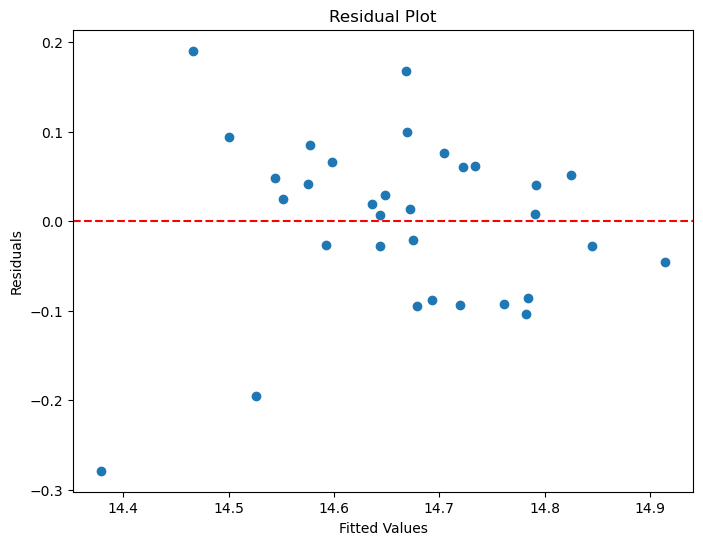

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('net_migration_data_combined_us.csv')

# Log-transform variables
data['ln_net_migration'] = np.log(data['net_migration'] + 1000000)  # Offset for negative values
data['ln_pop'] = np.log(data['pop'])
data['ln_gdp'] = np.log(data['gdp'])
data['ln_unemp'] = np.log(data['unemp'] + 1)
data['ln_edu'] = np.log(data['edu'] + 1)
data['ln_polstab'] = np.log(data['polstab'] + 1)
data['ln_gini'] = np.log(data['gini'] + 1)
# data['ln_urban'] = np.log(data['urban'])
# data['ln_lag_net_migration'] = np.log(data['lag_net_migration'] + 1000000)

# Define independent variables
X = data[['ln_pop', 'ln_gdp', 'ln_unemp', 'ln_edu', 'ln_polstab', 'ln_gini']]
y = data['ln_net_migration']

# Check for multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Scores:\n", vif_data)

# Add constant for regression
X = sm.add_constant(X)

# Fit the model with robust standard errors
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print summary
print(model.summary())

# Predict net migration
predictions = model.predict(X)
data['predicted_net_migration'] = np.exp(predictions) - 1000000  # Reverse the offset

# Residual diagnostics
residuals = y - predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig('residual_plot.png')

# Save predictions
data.to_csv('net_migration_predictions_combined.csv', index=False)

VIF Scores:
                variable          VIF
0                ln_pop  4205.980629
1                ln_gdp  8546.516651
2              ln_unemp    85.910027
3                ln_edu  6772.334970
4            ln_polstab     8.297233
5  ln_lag_net_migration  7319.219654
                    Robust linear Model Regression Results                    
Dep. Variable:       ln_net_migration   No. Observations:                   44
Model:                            RLM   Df Residuals:                       37
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 25 May 2025                                         
Time:                        17:38:08                                         
No. Iterations:  

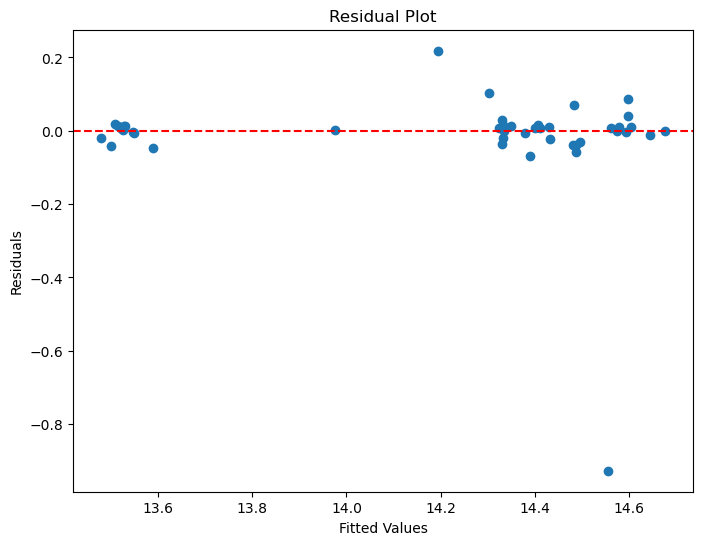

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('net_migration_data_combined.csv')

# Log-transform variables
data['ln_net_migration'] = np.log(data['net_migration'] + 500000)  # Smaller offset
data['ln_pop'] = np.log(data['pop'])
data['ln_gdp'] = np.log(data['gdp'])
data['ln_unemp'] = np.log(data['unemp'] + 1)
data['ln_edu'] = np.log(data['edu'] + 1)
data['ln_polstab'] = np.log(data['polstab'] + 1)
data['ln_lag_net_migration'] = np.log(data['lag_net_migration'] + 500000)

# Define independent variables (drop ln_gini, ln_urban)
X = data[['ln_pop', 'ln_gdp', 'ln_unemp', 'ln_edu', 'ln_polstab', 'ln_lag_net_migration']]
y = data['ln_net_migration']

# Check for multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Scores:\n", vif_data)

# Add constant for regression
X = sm.add_constant(X)

# Fit robust regression model (Huber loss)
model = RLM(y, X, M=sm.robust.norms.HuberT()).fit()

# Print summary
print(model.summary())

# Predict net migration
predictions = model.predict(X)
data['predicted_net_migration'] = np.exp(predictions) - 500000  # Reverse the offset

# Residual diagnostics
residuals = y - predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig('residual_plot_robust.png')

# Save predictions
data.to_csv('net_migration_predictions_robust.csv', index=False)

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
data = pd.read_csv('net_migration_data_combined_us.csv')

# Drop 1991 due to missing lag_net_migration (alternatively, impute if needed)
data = data[data['year'] != 1991]

# Log-transform variables
data['ln_net_migration'] = np.log(data['net_migration'] + 1000000)
data['ln_pop'] = np.log(data['pop'])
data['ln_gdp'] = np.log(data['gdp'])
data['ln_unemp'] = np.log(data['unemp'] + 1)
data['ln_edu'] = np.log(data['edu'] + 1)
data['ln_polstab'] = np.log(data['polstab'] + 1)
data['ln_gini'] = np.log(data['gini'])
data['ln_urban'] = np.log(data['urban'])
data['ln_lag_net_migration'] = np.log(data['lag_net_migration'] + 1000000)

# Define independent variables
X = data[['ln_pop', 'ln_gdp', 'ln_unemp', 'ln_edu', 'ln_polstab', 'ln_gini', 'ln_urban', 'ln_lag_net_migration']]
y = data['ln_net_migration']

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Results:")
print(vif_data)

# Add constant for regression
X = sm.add_constant(X)

# Fit the model with robust standard errors
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print summary
print(model.summary())

# Predict net migration
predictions = model.predict(X)
data['predicted_net_migration'] = np.exp(predictions) - 1000000

# Save predictions
data.to_csv('net_migration_predictions_usa.csv', index=False)

VIF Results:
               variable           VIF
0                ln_pop  4.138005e+07
1                ln_gdp  8.063989e+05
2              ln_unemp  6.439436e+02
3                ln_edu  2.218320e+04
4            ln_polstab  1.000665e+01
5               ln_gini  1.827607e+05
6              ln_urban  5.449948e+07
7  ln_lag_net_migration  2.228984e+04
                            OLS Regression Results                            
Dep. Variable:       ln_net_migration   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     4.607
Date:                Sun, 25 May 2025   Prob (F-statistic):            0.00207
Time:                        17:47:53   Log-Likelihood:                 31.400
No. Observations:                  31   AIC:                            -44.80
Df Residuals:                      22   BIC:                            -31.89
Df Model:    

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
data = pd.read_csv('us_dummy.csv')

# Add COVID-19 dummy for 2020-2021
data['covid_2020_2021'] = data['year'].isin([2020, 2021]).astype(int)

# Center GDP to reduce multicollinearity
data['gdp_centered'] = data['gdp'] - data['gdp'].mean()

# Log-transform variables with error checking
data['ln_net_migration'] = np.log(data['net_migration'] + 1000000)
data['ln_gdp_centered'] = np.log(data['gdp_centered'].abs() + 1) * np.sign(data['gdp_centered'])
data['ln_unemp'] = np.log(data['unemp'] + 1)
data['ln_edu'] = np.log(data['edu'] + 1)
data['ln_polstab'] = np.log(data['polstab'] + 2)  # Offset by 2 to handle negative values
data['ln_lag_net_migration'] = np.log(data['lag_net_migration'] + 1000000)

# Check for NaN/Inf
print("NaN/Inf Check Before Model:")
print(data[['ln_net_migration', 'ln_gdp_centered', 'ln_unemp', 'ln_edu', 'ln_polstab', 'ln_lag_net_migration']].isna().sum())
print(data[['ln_net_migration', 'ln_gdp_centered', 'ln_unemp', 'ln_edu', 'ln_polstab', 'ln_lag_net_migration']].isin([np.inf, -np.inf]).sum())

# Define independent variables
X = data[['ln_gdp_centered', 'ln_unemp', 'ln_edu', 'ln_polstab', 'ln_lag_net_migration', 'covid_2020_2021']]
y = data['ln_net_migration']

# Check VIF
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Results:")
print(vif_data)

# Add constant
X = sm.add_constant(X)

# Fit Prais-Winsten model (handles autocorrelation, includes first observation)
model = sm.GLSAR(y, X, rho=1).fit()

# Print summary
print(model.summary())

# Predict net migration
predictions = model.predict(X)
data['predicted_net_migration'] = np.exp(predictions) - 1000000

# Save predictions
# data.to_csv('net_migration_predictions_usa.csv', index=False)

NaN/Inf Check Before Model:
ln_net_migration        0
ln_gdp_centered         0
ln_unemp                0
ln_edu                  0
ln_polstab              0
ln_lag_net_migration    0
dtype: int64
ln_net_migration        0
ln_gdp_centered         0
ln_unemp                0
ln_edu                  0
ln_polstab              0
ln_lag_net_migration    0
dtype: int64
VIF Results:
               variable          VIF
0       ln_gdp_centered     3.889059
1              ln_unemp   121.418206
2                ln_edu  7197.319934
3            ln_polstab   100.862007
4  ln_lag_net_migration  9267.848800
5       covid_2020_2021     2.357556
                           GLSAR Regression Results                           
Dep. Variable:       ln_net_migration   R-squared:                       0.874
Model:                          GLSAR   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     26.55
Date:                Sun, 25 May 2025   Prob (

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('us_dummy.csv')

# Add COVID-19 dummy for 2020-2021
data['covid_2020_2021'] = data['year'].isin([2020, 2021]).astype(int)

# Center GDP to reduce multicollinearity
data['gdp_centered'] = data['gdp'] - data['gdp'].mean()

# Log-transform variables with simplified offsets
data['ln_net_migration'] = np.log(data['net_migration'] + 100)  # Reduced offset
data['ln_gdp_centered'] = np.log(data['gdp_centered'].abs() + 1) * np.sign(data['gdp_centered'])
data['ln_unemp'] = np.log(data['unemp'] + 1)
data['ln_polstab'] = np.log(data['polstab'] + 2)  # Keep offset for negative values

# Drop high-VIF variables (ln_edu, ln_lag_net_migration) to reduce multicollinearity
# Check correlations to confirm
X = data[['ln_gdp_centered', 'ln_unemp', 'ln_polstab', 'covid_2020_2021']]
print("Correlation Matrix:")
print(X.corr())

# Check for NaN/Inf
print("NaN/Inf Check Before Model:")
print(X.isna().sum())
print(X.isin([np.inf, -np.inf]).sum())

# Standardize predictors for ridge regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check VIF for reduced set
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Results:")
print(vif_data)

# Define dependent variable
y = data['ln_net_migration']

# Add constant for Prais-Winsten
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit Prais-Winsten model (rho=1 for simplicity, adjust based on diagnostics)
model = sm.GLSAR(y, X_scaled_with_const, rho=1).fit()
print("Prais-Winsten Model Summary:")
print(model.summary())

# Fit Ridge regression as an alternative to handle any residual multicollinearity
ridge = Ridge(alpha=1.0)  # Alpha can be tuned
ridge.fit(X_scaled, y)
print("Ridge Regression Coefficients:")
for var, coef in zip(X.columns, ridge.coef_):
    print(f"{var}: {coef:.4f}")
print(f"Ridge Intercept: {ridge.intercept_:.4f}")

# Predict net migration (using Prais-Winsten for consistency)
predictions = model.predict(X_scaled_with_const)
data['predicted_net_migration'] = np.exp(predictions) - 100  # Match reduced offset

# Save predictions
# data.to_csv('net_migration_predictions_usa_improved.csv', index=False)

Correlation Matrix:
                 ln_gdp_centered  ln_unemp  ln_polstab  covid_2020_2021
ln_gdp_centered         1.000000  0.130705   -0.500465         0.283949
ln_unemp                0.130705  1.000000    0.077573         0.155009
ln_polstab             -0.500465  0.077573    1.000000        -0.463277
covid_2020_2021         0.283949  0.155009   -0.463277         1.000000
NaN/Inf Check Before Model:
ln_gdp_centered    0
ln_unemp           0
ln_polstab         0
covid_2020_2021    0
dtype: int64
ln_gdp_centered    0
ln_unemp           0
ln_polstab         0
covid_2020_2021    0
dtype: int64
VIF Results:
          variable        VIF
0  ln_gdp_centered   1.320148
1         ln_unemp  49.115989
2       ln_polstab  47.654408
3  covid_2020_2021   1.372193
Prais-Winsten Model Summary:
                           GLSAR Regression Results                           
Dep. Variable:       ln_net_migration   R-squared:                       0.865
Model:                          GLSAR   Adj. R-s

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('us_dummy.csv')

# Add COVID-19 dummy for 2020-2021
data['covid_2020_2021'] = data['year'].isin([2020, 2021]).astype(int)

# Center GDP
data['gdp_centered'] = data['gdp'] - data['gdp'].mean()

# Log-transform variables
data['ln_net_migration'] = np.log(data['net_migration'] + 100)
data['ln_gdp_centered'] = np.log(data['gdp_centered'].abs() + 1) * np.sign(data['gdp_centered'])

# Add interaction term
data['gdp_covid_interaction'] = data['ln_gdp_centered'] * data['covid_2020_2021']

# Define independent variables (drop ln_unemp, ln_polstab)
X = data[['ln_gdp_centered', 'covid_2020_2021', 'gdp_covid_interaction']]
y = data['ln_net_migration']

# Check correlations
print("Correlation Matrix:")
print(X.corr())

# Check for NaN/Inf
print("NaN/Inf Check Before Model:")
print(X.isna().sum())
print(X.isin([np.inf, -np.inf]).sum())

# Check VIF
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Results:")
print(vif_data)

# Add constant
X = sm.add_constant(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Prais-Winsten model
model = sm.GLSAR(y_train, X_train, rho=1).fit()
print("Prais-Winsten Model Summary:")
print(model.summary())

# Check for outliers using standardized residuals
residuals = model.resid
std_residuals = residuals / residuals.std()
print("Standardized Residuals Check (absolute values > 3):")
print(std_residuals[abs(std_residuals) > 3])

# Predict on test set
predictions_test = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"Test RMSE: {rmse:.4f}")

# Predict on full dataset
predictions = model.predict(X)
data['predicted_net_migration'] = np.exp(predictions) - 100

# Save predictions
data.to_csv('US_prais.csv', index=False)

Correlation Matrix:
                       ln_gdp_centered  covid_2020_2021  gdp_covid_interaction
ln_gdp_centered               1.000000         0.283949               0.283987
covid_2020_2021               0.283949         1.000000               0.999857
gdp_covid_interaction         0.283987         0.999857               1.000000
NaN/Inf Check Before Model:
ln_gdp_centered          0
covid_2020_2021          0
gdp_covid_interaction    0
dtype: int64
ln_gdp_centered          0
covid_2020_2021          0
gdp_covid_interaction    0
dtype: int64
VIF Results:
                variable          VIF
0        ln_gdp_centered     1.085360
1        covid_2020_2021  3732.026994
2  gdp_covid_interaction  3732.112354
Prais-Winsten Model Summary:
                           GLSAR Regression Results                           
Dep. Variable:       ln_net_migration   R-squared:                       0.945
Model:                          GLSAR   Adj. R-squared:                  0.940
Method:          

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os

# Load the dataset (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('migrationdata.csv')

# Create output directory for saving results
if not os.path.exists('country_results'):
    os.makedirs('country_results')

# Get unique countries
countries = data['country'].unique()

# Loop through each country
for country in countries:
    print(f"\nProcessing {country}...\n")
    
    # Filter data for the current country
    country_data = data[data['country'] == country].copy()
    
    # Add COVID-19 dummy for 2020-2021
    country_data['covid_2020_2021'] = country_data['year'].isin([2020, 2021]).astype(int)
    
    # Center GDP
    country_data['gdp_centered'] = country_data['gdp'] - country_data['gdp'].mean()
    
    # Log-transform variables
    # Adding 100 to net_migration to handle negative values
    country_data['ln_net_migration'] = np.log(country_data['net_migration'] + 100)
    country_data['ln_gdp_centered'] = np.log(country_data['gdp_centered'].abs() + 1) * np.sign(country_data['gdp_centered'])
    
    # Add interaction term
    country_data['gdp_covid_interaction'] = country_data['ln_gdp_centered'] * country_data['covid_2020_2021']
    
    # Define independent variables
    X = country_data[['ln_gdp_centered', 'covid_2020_2021', 'gdp_covid_interaction']]
    y = country_data['ln_net_migration']
    
    # Check correlations
    print(f"Correlation Matrix for {country}:")
    print(X.corr())
    
    # Check for NaN/Inf
    print(f"\nNaN/Inf Check Before Model for {country}:")
    print(X.isna().sum())
    print(X.isin([np.inf, -np.inf]).sum())
    
    # Check VIF
    vif_data = pd.DataFrame()
    vif_data['variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f"\nVIF Results for {country}:")
    print(vif_data)
    
    # Add constant
    X = sm.add_constant(X)
    
    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit Prais-Winsten model
    try:
        model = sm.GLSAR(y_train, X_train, rho=1).fit()
        print(f"\nPrais-Winsten Model Summary for {country}:")
        print(model.summary())
        
        # Check for outliers using standardized residuals
        residuals = model.resid
        std_residuals = residuals / residuals.std()
        print(f"\nStandardized Residuals Check for {country} (absolute values > 3):")
        print(std_residuals[abs(std_residuals) > 3])
        
        # Predict on test set
        predictions_test = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
        print(f"\nTest RMSE for {country}: {rmse:.4f}")
        
        # Predict on full dataset
        predictions = model.predict(X)
        country_data['predicted_net_migration'] = np.exp(predictions) - 100
        
        # Save predictions to CSV
        output_file = f'./model_outputs/{country.replace(" ", "_")}_prais.csv'
        country_data.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")
        
    except Exception as e:
        print(f"Error fitting model for {country}: {str(e)}")

print("\nProcessing complete for all countries.")


Processing United States...

Correlation Matrix for United States:
                       ln_gdp_centered  covid_2020_2021  gdp_covid_interaction
ln_gdp_centered               1.000000         0.267066               0.267088
covid_2020_2021               0.267066         1.000000               0.999903
gdp_covid_interaction         0.267088         0.999903               1.000000

NaN/Inf Check Before Model for United States:
ln_gdp_centered          0
covid_2020_2021          0
gdp_covid_interaction    0
dtype: int64
ln_gdp_centered          0
covid_2020_2021          0
gdp_covid_interaction    0
dtype: int64

VIF Results for United States:
                variable          VIF
0        ln_gdp_centered     1.068828
1        covid_2020_2021  5465.682706
2  gdp_covid_interaction  5465.751534

Prais-Winsten Model Summary for United States:
                           GLSAR Regression Results                           
Dep. Variable:       ln_net_migration   R-squared:                    

c:\Users\jummd\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jummd\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jummd\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jummd\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jummd\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jummd\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  r

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os

# Load the dataset
data = pd.read_csv('migrationdata.csv')  # Replace with your CSV file path

# Create output directory
if not os.path.exists('country_results'):
    os.makedirs('country_results')

# Get unique countries
countries = data['country'].unique()

# Initialize a log file for errors
log_file = open('country_results/error_log.txt', 'w')

for country in countries:
    print(f"\nProcessing {country}...\n")
    
    # Filter data for the current country
    country_data = data[data['country'] == country].copy()
    
    # Check for sufficient data points (at least 10 observations)
    if len(country_data) < 10:
        error_msg = f"Error for {country}: Insufficient data points ({len(country_data)} < 10)\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Check for missing values
    if country_data[['gdp', 'net_migration']].isna().any().any():
        error_msg = f"Error for {country}: Missing values in gdp or net_migration\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Add COVID-19 dummy for 2020-2021
    country_data['covid_2020_2021'] = country_data['year'].isin([2020, 2021]).astype(int)
    
    # Center GDP
    country_data['gdp_centered'] = country_data['gdp'] - country_data['gdp'].mean()
    
    # Log-transform variables
    # Shift net_migration to ensure positive values for log
    min_net_migration = country_data['net_migration'].min()
    shift = abs(min_net_migration) + 100 if min_net_migration <= 0 else 100
    country_data['ln_net_migration'] = np.log(country_data['net_migration'] + shift)
    country_data['ln_gdp_centered'] = np.log(country_data['gdp_centered'].abs() + 1) * np.sign(country_data['gdp_centered'])
    
    # Define independent variables (removed gdp_covid_interaction to reduce multicollinearity)
    X = country_data[['ln_gdp_centered', 'covid_2020_2021']]
    y = country_data['ln_net_migration']
    
    # Check correlations
    print(f"Correlation Matrix for {country}:")
    print(X.corr())
    
    # Check for NaN/Inf
    print(f"\nNaN/Inf Check Before Model for {country}:")
    print(X.isna().sum())
    print(X.isin([np.inf, -np.inf]).sum())
    
    # Check VIF
    vif_data = pd.DataFrame()
    vif_data['variable'] = X.columns
    try:
        vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        print(f"\nVIF Results for {country}:")
        print(vif_data)
    except np.linalg.LinAlgError:
        error_msg = f"Error for {country}: VIF calculation failed (possible singular matrix)\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Add constant
    X = sm.add_constant(X)
    
    # Train-test split (80-20)
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    except ValueError as e:
        error_msg = f"Error for {country}: Train-test split failed ({str(e)})\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Fit Prais-Winsten model, fall back to OLS if it fails
    try:
        model = sm.GLSAR(y_train, X_train, rho=1).fit()
        model_type = "Prais-Winsten"
    except (np.linalg.LinAlgError, ValueError) as e:
        error_msg = f"Warning for {country}: Prais-Winsten failed ({str(e)}), falling back to OLS\n"
        print(error_msg)
        log_file.write(error_msg)
        model = sm.OLS(y_train, X_train).fit()
        model_type = "OLS"
    
    print(f"\n{model_type} Model Summary for {country}:")
    print(model.summary())
    
    # Check for outliers using standardized residuals
    residuals = model.resid
    std_residuals = residuals / residuals.std()
    print(f"\nStandardized Residuals Check for {country} (absolute values > 3):")
    print(std_residuals[abs(std_residuals) > 3])
    
    # Predict on test set
    predictions_test = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"\nTest RMSE for {country}: {rmse:.4f}")
    
    # Predict on full dataset
    predictions = model.predict(X)
    country_data['predicted_net_migration'] = np.exp(predictions) - shift
    
    # Save predictions to CSV
    output_file = f'country_results/{country.replace(" ", "_")}_prais.csv'
    country_data.to_csv(output_file, index=False)
    print(f"Predictions saved to {output_file}")

log_file.close()
print("\nProcessing complete for all countries. Check 'country_results/error_log.txt' for details on any errors.")


Processing United States...

Correlation Matrix for United States:
                 ln_gdp_centered  covid_2020_2021
ln_gdp_centered         1.000000         0.267066
covid_2020_2021         0.267066         1.000000

NaN/Inf Check Before Model for United States:
ln_gdp_centered    0
covid_2020_2021    0
dtype: int64
ln_gdp_centered    0
covid_2020_2021    0
dtype: int64

VIF Results for United States:
          variable       VIF
0  ln_gdp_centered  1.068814
1  covid_2020_2021  1.068814

Prais-Winsten Model Summary for United States:
                           GLSAR Regression Results                           
Dep. Variable:       ln_net_migration   R-squared:                       0.543
Model:                          GLSAR   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     14.86
Date:                Sun, 25 May 2025   Prob (F-statistic):           5.60e-05
Time:                        19:34:37   Log-Likelihood:        


Processing Australia...

Correlation Matrix for Australia:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.082657  0.820167   
ln_gdp_centered_sq            0.082657            1.000000  0.295067   
ln_gini                       0.820167            0.295067  1.000000   
ln_unemp                     -0.708845            0.216579 -0.620345   
polstab_centered             -0.774175            0.248332 -0.602403   
ln_gdp_centered_lag1          0.972537            0.259428  0.850088   
polstab_centered_lag1        -0.832374            0.214598 -0.662050   
covid_2020_2021               0.263434            0.100448  0.219880   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered       -0.708845         -0.774175              0.972537   
ln_gdp_centered_sq     0.216579          0.248332              0.259428   
ln_gini               -0.620345         -0.602403              0.8

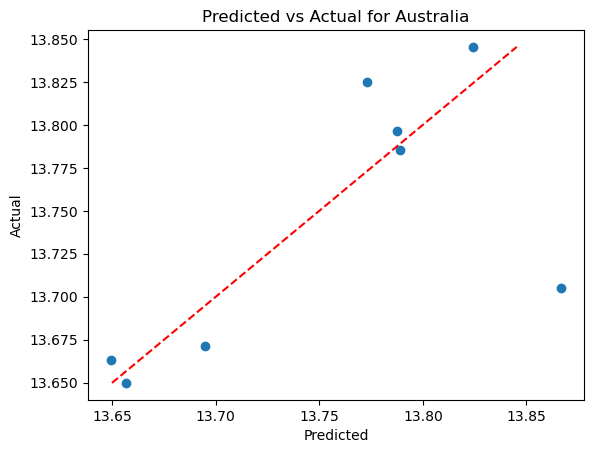


Processing Brazil...

Correlation Matrix for Brazil:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.226697 -0.800942   
ln_gdp_centered_sq            0.226697            1.000000 -0.175173   
ln_gini                      -0.800942           -0.175173  1.000000   
ln_unemp                      0.375935           -0.371343 -0.502027   
polstab_centered             -0.336515            0.210670  0.307380   
ln_gdp_centered_lag1          0.962751            0.297356 -0.780368   
polstab_centered_lag1        -0.328084            0.238308  0.290639   
covid_2020_2021               0.241314           -0.292759 -0.240482   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered        0.375935         -0.336515              0.962751   
ln_gdp_centered_sq    -0.371343          0.210670              0.297356   
ln_gini               -0.502027          0.307380             -0.780368 

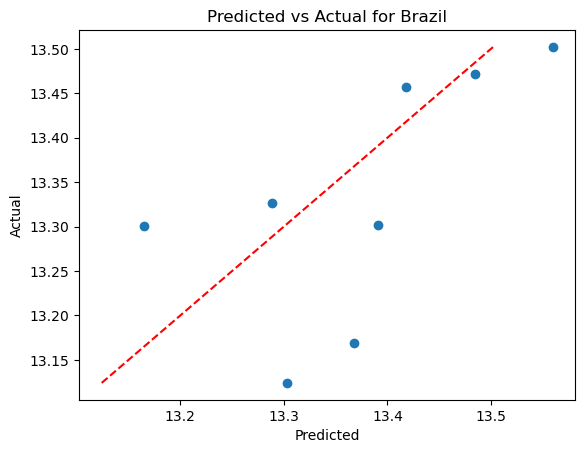


Processing Canada...

Correlation Matrix for Canada:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.072701  0.285960   
ln_gdp_centered_sq            0.072701            1.000000 -0.441352   
ln_gini                       0.285960           -0.441352  1.000000   
ln_unemp                     -0.588496            0.104841 -0.333966   
polstab_centered             -0.490502            0.273611 -0.276144   
ln_gdp_centered_lag1          0.963580            0.217636  0.238945   
polstab_centered_lag1        -0.578770            0.207361 -0.371571   
covid_2020_2021               0.246067            0.089915 -0.245106   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered       -0.588496         -0.490502              0.963580   
ln_gdp_centered_sq     0.104841          0.273611              0.217636   
ln_gini               -0.333966         -0.276144              0.238945 

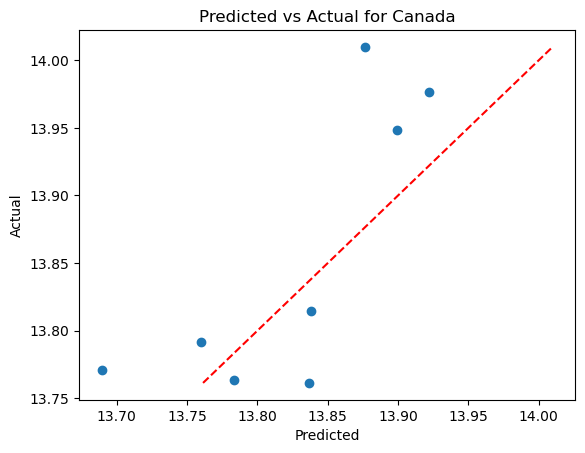


Processing Germany...

Correlation Matrix for Germany:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000           -0.027365  0.874938   
ln_gdp_centered_sq           -0.027365            1.000000  0.059994   
ln_gini                       0.874938            0.059994  1.000000   
ln_unemp                     -0.467197           -0.591458 -0.620183   
polstab_centered             -0.824320            0.134973 -0.821480   
ln_gdp_centered_lag1          0.973885            0.161030  0.860167   
polstab_centered_lag1        -0.895031            0.195125 -0.863527   
covid_2020_2021               0.249840            0.179849  0.399758   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered       -0.467197         -0.824320              0.973885   
ln_gdp_centered_sq    -0.591458          0.134973              0.161030   
ln_gini               -0.620183         -0.821480              0.86016

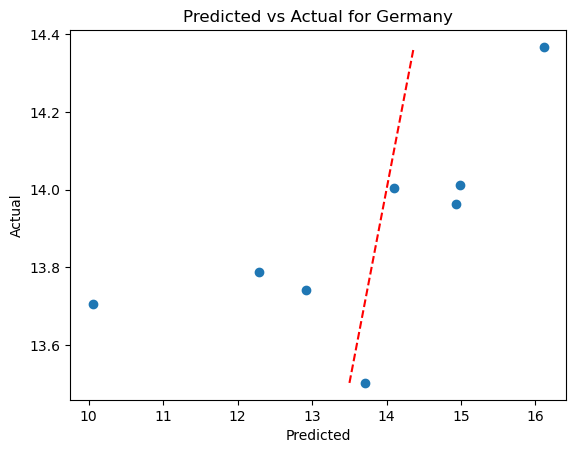


Processing Ireland...

Correlation Matrix for Ireland:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000           -0.116271 -0.800401   
ln_gdp_centered_sq           -0.116271            1.000000 -0.076156   
ln_gini                      -0.800401           -0.076156  1.000000   
ln_unemp                     -0.292928            0.111478  0.612485   
polstab_centered             -0.867589           -0.083243  0.635234   
ln_gdp_centered_lag1          0.963815           -0.022750 -0.808284   
polstab_centered_lag1        -0.831454           -0.195486  0.625490   
covid_2020_2021               0.257469            0.368789 -0.370080   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered       -0.292928         -0.867589              0.963815   
ln_gdp_centered_sq     0.111478         -0.083243             -0.022750   
ln_gini                0.612485          0.635234             -0.80828

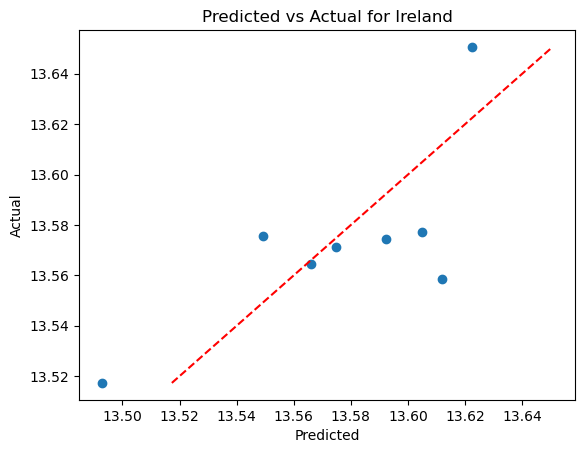


Processing Japan...

Correlation Matrix for Japan:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.044427  0.349759   
ln_gdp_centered_sq            0.044427            1.000000  0.063260   
ln_gini                       0.349759            0.063260  1.000000   
ln_unemp                      0.226274           -0.220761 -0.112535   
polstab_centered             -0.514793           -0.154376 -0.584492   
ln_gdp_centered_lag1          0.533441            0.008855  0.195072   
polstab_centered_lag1        -0.486870           -0.185660 -0.457133   
covid_2020_2021               0.209906            0.046103  0.218683   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered        0.226274         -0.514793              0.533441   
ln_gdp_centered_sq    -0.220761         -0.154376              0.008855   
ln_gini               -0.112535         -0.584492              0.195072   

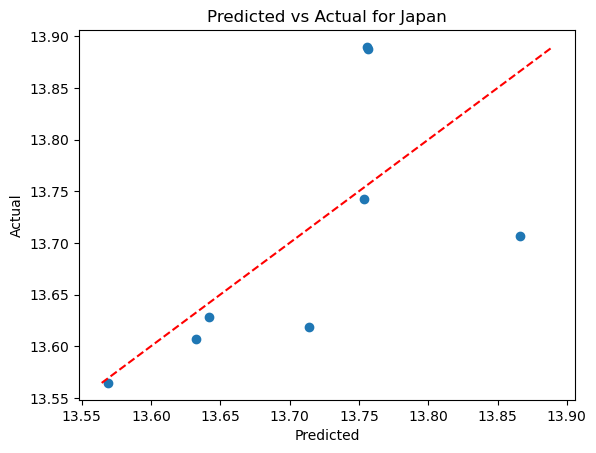


Processing Kazakhstan...

Correlation Matrix for Kazakhstan:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.213523 -0.941382   
ln_gdp_centered_sq            0.213523            1.000000 -0.129878   
ln_gini                      -0.941382           -0.129878  1.000000   
ln_unemp                      0.128980           -0.092382 -0.144887   
polstab_centered              0.150426           -0.486356 -0.174493   
ln_gdp_centered_lag1          0.967586            0.319133 -0.925696   
polstab_centered_lag1         0.264901           -0.353828 -0.307411   
covid_2020_2021               0.271352            0.071352 -0.192468   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered        0.128980          0.150426              0.967586   
ln_gdp_centered_sq    -0.092382         -0.486356              0.319133   
ln_gini               -0.144887         -0.174493             -0

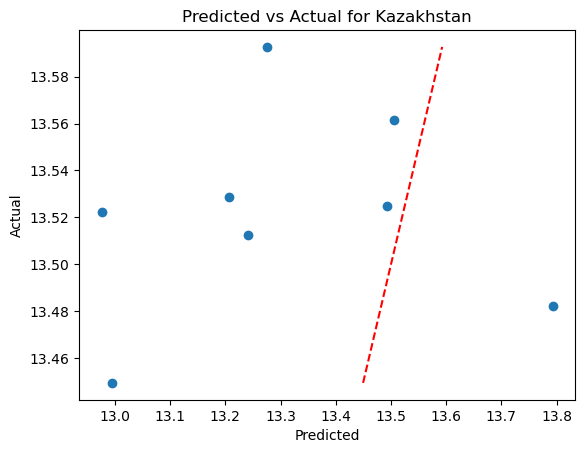


Processing Korea Rep....

Correlation Matrix for Korea Rep.:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.025775  0.554023   
ln_gdp_centered_sq            0.025775            1.000000  0.354704   
ln_gini                       0.554023            0.354704  1.000000   
ln_unemp                      0.139316            0.029402  0.171500   
polstab_centered             -0.279518            0.223398 -0.387665   
ln_gdp_centered_lag1          0.963367            0.138548  0.582733   
polstab_centered_lag1        -0.347097            0.184068 -0.411025   
covid_2020_2021               0.262622            0.277701  0.205915   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered        0.139316         -0.279518              0.963367   
ln_gdp_centered_sq     0.029402          0.223398              0.138548   
ln_gini                0.171500         -0.387665              0

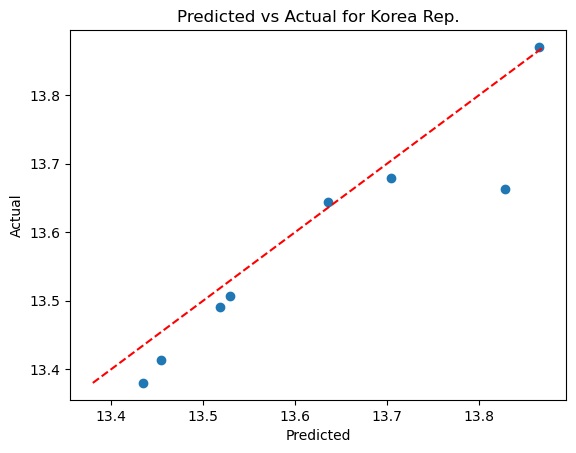


Processing United Kingdom...

Correlation Matrix for United Kingdom:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000           -0.055803 -0.602144   
ln_gdp_centered_sq           -0.055803            1.000000 -0.313445   
ln_gini                      -0.602144           -0.313445  1.000000   
ln_unemp                     -0.559414            0.368797  0.181691   
polstab_centered             -0.899136            0.245921  0.494768   
ln_gdp_centered_lag1          0.962193            0.099857 -0.610717   
polstab_centered_lag1        -0.913028            0.054089  0.538532   
covid_2020_2021               0.219500            0.033955 -0.339612   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered       -0.559414         -0.899136              0.962193   
ln_gdp_centered_sq     0.368797          0.245921              0.099857   
ln_gini                0.181691          0.494768       

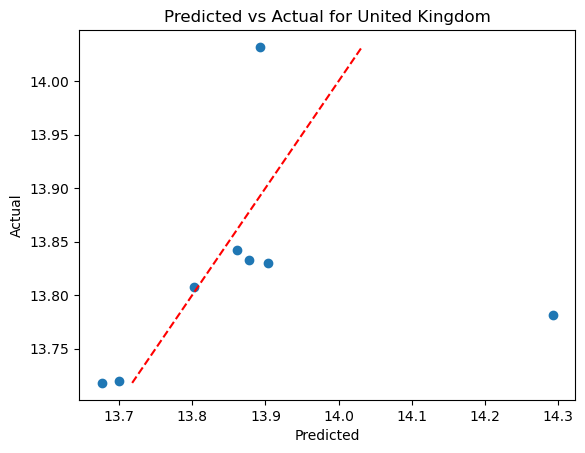


Processing United States...

Correlation Matrix for United States:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.041627  0.628053   
ln_gdp_centered_sq            0.041627            1.000000 -0.318295   
ln_gini                       0.628053           -0.318295  1.000000   
ln_unemp                      0.061186           -0.117042 -0.240686   
polstab_centered             -0.611922            0.282983 -0.491471   
ln_gdp_centered_lag1          0.969244            0.149519  0.593417   
polstab_centered_lag1        -0.711435            0.262362 -0.502760   
covid_2020_2021               0.264391            0.288228 -0.100627   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered        0.061186         -0.611922              0.969244   
ln_gdp_centered_sq    -0.117042          0.282983              0.149519   
ln_gini               -0.240686         -0.491471         

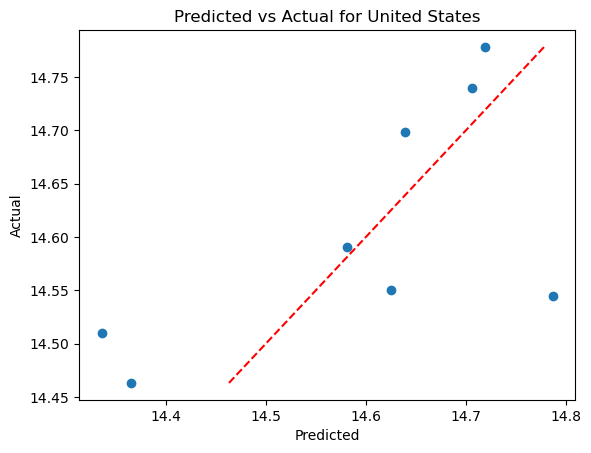


Processing complete for all countries. Check 'country_results/error_log.txt' for details on any errors.


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('migrationdata.csv')

# Create output directory
if not os.path.exists('country_results'):
    os.makedirs('country_results')

# Initialize a log file for errors
log_file = open('country_results/error_log.txt', 'w')

# Prepare data
data = data.sort_values(['country', 'year'])  # Ensure sorted for lagging
data['covid_2020_2021'] = data['year'].isin([2020, 2021]).astype(int)

# Center and transform variables
data['gdp_centered'] = data.groupby('country')['gdp'].transform(lambda x: x - x.mean())
data['ln_gdp_centered'] = np.log(data['gdp_centered'].abs() + 1) * np.sign(data['gdp_centered'])
data['ln_gdp_centered_sq'] = data['ln_gdp_centered'] ** 2  # Squared term for nonlinearity
data['ln_gini'] = np.log(data['gini'] + 1)  # Log-transform Gini
data['ln_unemp'] = np.log(data['unemp'] + 1)  # Log-transform unemployment
data['polstab_centered'] = data.groupby('country')['polstab'].transform(lambda x: x - x.mean())

# Create lagged variables
data['ln_gdp_centered_lag1'] = data.groupby('country')['ln_gdp_centered'].shift(1)
data['polstab_centered_lag1'] = data.groupby('country')['polstab_centered'].shift(1)

# Log-transform net_migration with a smaller shift
min_net_migration = data['net_migration'].min()
shift = abs(min_net_migration) + 1 if min_net_migration <= 0 else 1
data['ln_net_migration'] = np.log(data['net_migration'] + shift)

# Drop rows with missing lagged values
data = data.dropna()

# Get unique countries
countries = data['country'].unique()

for country in countries:
    print(f"\nProcessing {country}...\n")
    
    # Filter data for the current country
    country_data = data[data['country'] == country].copy()
    
    # Check for sufficient data points
    if len(country_data) < 10:
        error_msg = f"Error for {country}: Insufficient data points ({len(country_data)} < 10)\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Check for missing values
    if country_data[['ln_net_migration', 'ln_gdp_centered', 'ln_gdp_centered_sq', 'ln_gini', 
                     'ln_unemp', 'polstab_centered', 'ln_gdp_centered_lag1', 
                     'polstab_centered_lag1', 'covid_2020_2021']].isna().any().any():
        error_msg = f"Error for {country}: Missing values in predictors or response\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Define independent variables
    X = country_data[['ln_gdp_centered', 'ln_gdp_centered_sq', 'ln_gini', 'ln_unemp', 
                      'polstab_centered', 'ln_gdp_centered_lag1', 'polstab_centered_lag1', 
                      'covid_2020_2021']]
    y = country_data['ln_net_migration']
    
    # Check correlations
    print(f"Correlation Matrix for {country}:")
    print(X.corr())
    
    # Check for NaN/Inf
    print(f"\nNaN/Inf Check Before Model for {country}:")
    print(X.isna().sum())
    print(X.isin([np.inf, -np.inf]).sum())
    
    # Check VIF
    vif_data = pd.DataFrame()
    vif_data['variable'] = X.columns
    try:
        vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        print(f"\nVIF Results for {country}:")
        print(vif_data)
        if (vif_data['VIF'] > 10).any():
            error_msg = f"Warning for {country}: High VIF detected, potential multicollinearity\n"
            print(error_msg)
            log_file.write(error_msg)
    except np.linalg.LinAlgError:
        error_msg = f"Error for {country}: VIF calculation failed (possible singular matrix)\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Add constant
    X = sm.add_constant(X)
    
    # Train-test split
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    except ValueError as e:
        error_msg = f"Error for {country}: Train-test split failed ({str(e)})\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Fit Prais-Winsten with robust standard errors
    try:
        model = sm.GLSAR(y_train, X_train, rho=1).fit(cov_type='HC3')  # HC3 for robust standard errors
        model_type = "Prais-Winsten"
    except (np.linalg.LinAlgError, ValueError) as e:
        error_msg = f"Warning for {country}: Prais-Winsten failed ({str(e)}), falling back to OLS\n"
        print(error_msg)
        log_file.write(error_msg)
        model = sm.OLS(y_train, X_train).fit(cov_type='HC3')
        model_type = "OLS"
    
    print(f"\n{model_type} Model Summary for {country}:")
    print(model.summary())
    
    # Check for outliers
    residuals = model.resid
    std_residuals = residuals / residuals.std()
    print(f"\nStandardized Residuals Check for {country} (absolute values > 3):")
    print(std_residuals[abs(std_residuals) > 3])
    
    # Predict on test set
    predictions_test = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"\nTest RMSE for {country}: {rmse:.4f}")
    
    # Predict on full dataset
    predictions = model.predict(X)
    country_data['predicted_net_migration'] = np.exp(predictions) - shift
    
    # Save predictions to CSV
    output = f'country_results/{country.replace(" ", "_")}_prais.csv'
    # country_data.to_csv(output_file, index=False)
    # print(f"Predictions saved to {output_file}")
    plt.scatter(predictions_test, y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Predicted vs Actual for {country}')
    plt.show()

log_file.close()
print("\nProcessing complete for all countries. Check 'country_results/error_log.txt' for details on any errors.")

In [29]:
from linearmodels.panel import PanelOLS
data_panel = data.set_index(['country', 'year'])
model = PanelOLS(data_panel['ln_net_migration'], 
                 data_panel[['ln_gdp_centered', 'ln_gdp_centered_sq', 'ln_gini', 
                             'ln_unemp', 'polstab_centered', 'ln_gdp_centered_lag1', 
                             'polstab_centered_lag1', 'covid_2020_2021']], 
                 entity_effects=True).fit(cov_type='robust')
print(model)

                          PanelOLS Estimation Summary                           
Dep. Variable:       ln_net_migration   R-squared:                        0.0330
Estimator:                   PanelOLS   R-squared (Between):              0.4227
No. Observations:                 360   R-squared (Within):               0.0330
Date:                Sun, May 25 2025   R-squared (Overall):              0.4215
Time:                        19:42:27   Log-likelihood                   -399.16
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.4573
Entities:                          10   P-value                           0.1717
Avg Obs:                       36.000   Distribution:                   F(8,342)
Min Obs:                       36.000                                           
Max Obs:                       36.000   F-statistic (robust):             3.3458
                            

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('migrationdata.csv')

# Create output directory
if not os.path.exists('country_results'):
    os.makedirs('country_results')

# Initialize a log file for errors
log_file = open('country_results/error_log.txt', 'w')

# Prepare data
data = data.sort_values(['country', 'year'])  # Ensure sorted for lagging
data['covid_2020_2021'] = data['year'].isin([2020, 2021]).astype(int)

# Center and transform variables
data['gdp_centered'] = data.groupby('country')['gdp'].transform(lambda x: x - x.mean())
data['ln_gdp_centered'] = np.log(data['gdp_centered'].abs() + 1) * np.sign(data['gdp_centered'])
data['ln_gdp_centered_sq'] = data['ln_gdp_centered'] ** 2  # Squared term for nonlinearity
data['ln_gini'] = np.log(data['gini'] + 1)  # Log-transform Gini
data['ln_unemp'] = np.log(data['unemp'] + 1)  # Log-transform unemployment
data['polstab_centered'] = data.groupby('country')['polstab'].transform(lambda x: x - x.mean())

# Create lagged variables
data['ln_gdp_centered_lag1'] = data.groupby('country')['ln_gdp_centered'].shift(1)
data['polstab_centered_lag1'] = data.groupby('country')['polstab_centered'].shift(1)

# Log-transform net_migration with a smaller shift
min_net_migration = data['net_migration'].min()
shift = abs(min_net_migration) + 1 if min_net_migration <= 0 else 1
data['ln_net_migration'] = np.log(data['net_migration'] + shift)

# Drop rows with missing lagged values
data = data.dropna()

# Get unique countries
countries = data['country'].unique()

for country in countries:
    print(f"\nProcessing {country}...\n")
    
    # Filter data for the current country
    country_data = data[data['country'] == country].copy()
    
    # Check for sufficient data points
    if len(country_data) < 10:
        error_msg = f"Error for {country}: Insufficient data points ({len(country_data)} < 10)\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Check for missing values
    predictors = ['ln_net_migration', 'ln_gdp_centered', 'ln_gdp_centered_sq', 'ln_gini', 
                  'ln_unemp', 'polstab_centered', 'ln_gdp_centered_lag1', 
                  'polstab_centered_lag1', 'covid_2020_2021']
    if country_data[predictors].isna().any().any():
        error_msg = f"Error for {country}: Missing values in predictors or response\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Define independent variables for OLS and Quadratic
    X = country_data[['ln_gdp_centered', 'ln_gdp_centered_sq', 'ln_gini', 'ln_unemp', 
                      'polstab_centered', 'ln_gdp_centered_lag1', 'polstab_centered_lag1', 
                      'covid_2020_2021']]
    y = country_data['ln_net_migration']
    
    # Check correlations
    print(f"Correlation Matrix for {country}:")
    print(X.corr())
    
    # Check for NaN/Inf
    print(f"\nNaN/Inf Check Before Model for {country}:")
    print(X.isna().sum())
    print(X.isin([np.inf, -np.inf]).sum())
    
    # Check VIF
    vif_data = pd.DataFrame()
    vif_data['variable'] = X.columns
    try:
        vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        print(f"\nVIF Results for {country}:")
        print(vif_data)
        if (vif_data['VIF'] > 10).any():
            error_msg = f"Warning for {country}: High VIF detected, potential multicollinearity\n"
            print(error_msg)
            log_file.write(error_msg)
    except np.linalg.LinAlgError:
        error_msg = f"Error for {country}: VIF calculation failed (possible singular matrix)\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Add constant for OLS and Quadratic
    X = sm.add_constant(X)
    
    # Train-test split
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    except ValueError as e:
        error_msg = f"Error for {country}: Train-test split failed ({str(e)})\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Dictionary to store results
    models = {}
    
    # 1. OLS Model
    try:
        model_ols = sm.OLS(y_train, X_train).fit(cov_type='HC3')
        models['OLS'] = {'model': model_ols, 'type': 'OLS'}
        print(f"\nOLS Model Summary for {country}:")
        print(model_ols.summary())
        
        # Check for outliers
        residuals = model_ols.resid
        std_residuals = residuals / residuals.std()
        print(f"\nStandardized Residuals Check for OLS in {country} (absolute values > 3):")
        print(std_residuals[abs(std_residuals) > 3])
        
        # Predict on test set
        predictions_test = model_ols.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
        print(f"\nTest RMSE for OLS in {country}: {rmse:.4f}")
        
        # Predict on full dataset
        predictions = model_ols.predict(X)
        country_data['predicted_net_migration_ols'] = np.exp(predictions) - shift


        
        # Plot predicted vs actual
        plt.figure(figsize=(8, 6))
        plt.scatter(predictions_test, y_test, label='Data points')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect fit')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'OLS Predicted vs Actual for {country}')
        plt.legend()
        plt.savefig(f'country_results/{country.replace(" ", "_")}_ols_plot.png')
        plt.close()
    except Exception as e:
        error_msg = f"Error for {country} OLS: Model fitting failed ({str(e)})\n"
        print(error_msg)
        log_file.write(error_msg)
    
    # 2. Quadratic Model (using the same predictors as OLS, emphasizing quadratic term)
    try:
        model_quad = sm.OLS(y_train, X_train).fit(cov_type='HC3')  # Same as OLS since ln_gdp_centered_sq is included
        models['Quadratic'] = {'model': model_quad, 'type': 'Quadratic'}
        print(f"\nQuadratic Model Summary for {country}:")
        print(model_quad.summary())
        
        # Check for outliers
        residuals = model_quad.resid
        std_residuals = residuals / residuals.std()
        print(f"\nStandardized Residuals Check for Quadratic in {country} (absolute values > 3):")
        print(std_residuals[abs(std_residuals) > 3])
        
        # Predict on test set
        predictions_test = model_quad.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
        print(f"\nTest RMSE for Quadratic in {country}: {rmse:.4f}")
        
        # Predict on full dataset
        predictions = model_quad.predict(X)
        country_data['predicted_net_migration_quad'] = np.exp(predictions) - shift

        
        # Plot predicted vs actual
        plt.figure(figsize=(8, 6))
        plt.scatter(predictions_test, y_test, label='Data points')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect fit')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Quadratic Predicted vs Actual for {country}')
        plt.legend()
        plt.savefig(f'country_results/{country.replace(" ", "_")}_quad_plot.png')
        plt.close()
    except Exception as e:
        error_msg = f"Error for {country} Quadratic: Model fitting failed ({str(e)})\n"
        print(error_msg)
        log_file.write(error_msg)
    
    # 3. 2SLS Model
    try:
        # Define endogenous variables (assumed to be ln_gdp_centered and polstab_centered)
        endog_vars = ['ln_gdp_centered', 'polstab_centered']
        # Define instruments (lagged variables)
        instruments = ['ln_gdp_centered_lag1', 'polstab_centered_lag1']
        # Remaining exogenous variables
        exog_vars = ['ln_gdp_centered_sq', 'ln_gini', 'ln_unemp', 'covid_2020_2021']
        
        # Prepare data for 2SLS
        X_2sls = country_data[exog_vars + endog_vars]
        Z_2sls = country_data[exog_vars + instruments]
        X_2sls = sm.add_constant(X_2sls)
        Z_2sls = sm.add_constant(Z_2sls)
        
        # Train-test split for 2SLS
        X_train_2sls, X_test_2sls, y_train_2sls, y_test_2sls = train_test_split(
            X_2sls, y, test_size=0.2, random_state=42
        )
        Z_train_2sls = Z_2sls.loc[X_train_2sls.index]
        
        # Fit 2SLS model (without cov_type)
        model_2sls = IV2SLS(y_train_2sls, X_train_2sls, instrument=Z_train_2sls).fit()
        models['2SLS'] = {'model': model_2sls, 'type': '2SLS'}
        print(f"\n2SLS Model Summary for {country}:")
        print(model_2sls.summary())
        
        # Check for outliers
        residuals = model_2sls.resid
        std_residuals = residuals / residuals.std()
        print(f"\nStandardized Residuals Check for 2SLS in {country} (absolute values > 3):")
        print(std_residuals[abs(std_residuals) > 3])
        
        # Predict on test set
        predictions_test = model_2sls.predict(X_test_2sls)
        rmse = np.sqrt(mean_squared_error(y_test_2sls, predictions_test))
        print(f"\nTest RMSE for 2SLS in {country}: {rmse:.4f}")
        
        # Predict on full dataset
        predictions = model_2sls.predict(X_2sls)
        country_data['predicted_net_migration_2sls'] = np.exp(predictions) - shift
        rmse = np.sqrt(mean_squared_error(y_test_2sls, predictions_test))
        print(f"\nTest RMSE for 2SLS in {country}: {rmse:.4f}")
        
        # Plot predicted vs actual
        plt.figure(figsize=(8, 6))
        plt.scatter(predictions_test, y_test_2sls, label='Data points')
        plt.plot([y_test_2sls.min(), y_test_2sls.max()], [y_test_2sls.min(), y_test_2sls.max()], 'r--', label='Perfect fit')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'2SLS Predicted vs Actual for {country}')
        plt.legend()
        plt.savefig(f'country_results/{country.replace(" ", "_")}_2sls_plot.png')
        plt.close()
    except Exception as e:
        error_msg = f"Error for {country} 2SLS: Model fitting failed ({str(e)})\n"
        print(error_msg)
        log_file.write(error_msg)
    
    # Save predictions to CSV
    output_file = f'country_results/{country.replace(" ", "_")}_predictions.csv'
    country_data.to_csv(output_file, index=False)
    print(f"Predictions saved to {output_file}")

log_file.close()
print("\nProcessing complete for all countries. Check 'country_results/error_log.txt' for details on any errors.")


Processing Australia...

Correlation Matrix for Australia:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.082657  0.820167   
ln_gdp_centered_sq            0.082657            1.000000  0.295067   
ln_gini                       0.820167            0.295067  1.000000   
ln_unemp                     -0.708845            0.216579 -0.620345   
polstab_centered             -0.774175            0.248332 -0.602403   
ln_gdp_centered_lag1          0.972537            0.259428  0.850088   
polstab_centered_lag1        -0.832374            0.214598 -0.662050   
covid_2020_2021               0.263434            0.100448  0.219880   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered       -0.708845         -0.774175              0.972537   
ln_gdp_centered_sq     0.216579          0.248332              0.259428   
ln_gini               -0.620345         -0.602403              0.8

In [30]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5, random_state=42).fit(X_train.drop('const', axis=1), y_train)
print("Selected features:", X_train.columns[lasso.coef_ != 0])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 8

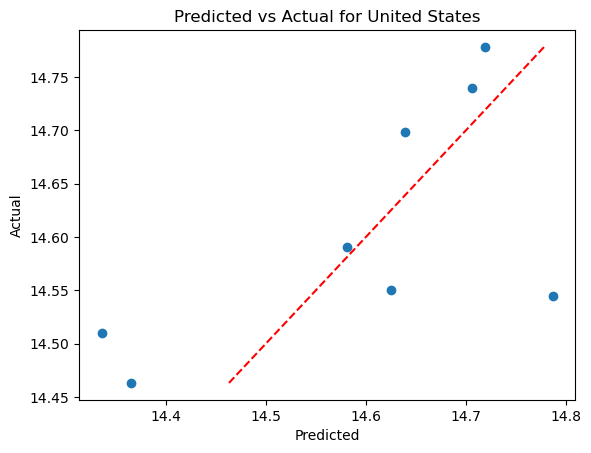

In [31]:
import matplotlib.pyplot as plt
plt.scatter(predictions_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Predicted vs Actual for {country}')
plt.show()

In [33]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5, random_state=42).fit(X_train.drop('const', axis=1), y_train)
print("Selected features:", X_train.drop('const', axis=1).columns[lasso.coef_ != 0])

Selected features: Index(['ln_gdp_centered', 'ln_gdp_centered_sq', 'ln_gini', 'ln_unemp',
       'polstab_centered', 'ln_gdp_centered_lag1', 'polstab_centered_lag1',
       'covid_2020_2021'],
      dtype='object')


In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import os

# Load the dataset
data = pd.read_csv('migrationdata.csv')

# Create output directory
if not os.path.exists('country_results'):
    os.makedirs('country_results')

# Initialize a log file for errors
log_file = open('country_results/error_log.txt', 'w')

# Prepare data
data = data.sort_values(['country', 'year'])
data['covid_2020_2021'] = data['year'].isin([2020, 2021]).astype(int)
data['gdp_centered'] = data.groupby('country')['gdp'].transform(lambda x: x - x.mean())
data['ln_gdp_centered'] = np.log(data['gdp_centered'].abs() + 1) * np.sign(data['gdp_centered'])
data['ln_gdp_centered_sq'] = data['ln_gdp_centered'] ** 2
data['ln_gini'] = np.log(data['gini'] + 1)
data['ln_unemp'] = np.log(data['unemp'] + 1)
data['polstab_centered'] = data.groupby('country')['polstab'].transform(lambda x: x - x.mean())
data['ln_gdp_centered_lag1'] = data.groupby('country')['ln_gdp_centered'].shift(1)
data['polstab_centered_lag1'] = data.groupby('country')['polstab_centered'].shift(1)
min_net_migration = data['net_migration'].min()
shift = abs(min_net_migration) + 1 if min_net_migration <= 0 else 1
data['ln_net_migration'] = np.log(data['net_migration'] + shift)
data = data.dropna()

# Get unique countries
countries = data['country'].unique()

for country in countries:
    print(f"\nProcessing {country}...\n")
    country_data = data[data['country'] == country].copy()
    
    if len(country_data) < 10:
        error_msg = f"Error for {country}: Insufficient data points ({len(country_data)} < 10)\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    predictors = ['ln_gdp_centered', 'ln_gdp_centered_sq', 'ln_gini', 'ln_unemp', 
                  'polstab_centered', 'ln_gdp_centered_lag1', 'polstab_centered_lag1', 
                  'covid_2020_2021']
    if country_data[predictors + ['ln_net_migration']].isna().any().any():
        error_msg = f"Error for {country}: Missing values in predictors or response\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    X = country_data[predictors]
    y = country_data['ln_net_migration']
    
    print(f"Correlation Matrix for {country}:")
    print(X.corr())
    
    print(f"\nNaN/Inf Check Before Model for {country}:")
    print(X.isna().sum())
    print(X.isin([np.inf, -np.inf]).sum())
    
    vif_data = pd.DataFrame()
    vif_data['variable'] = X.columns
    try:
        vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        print(f"\nVIF Results for {country}:")
        print(vif_data)
        if (vif_data['VIF'] > 10).any():
            print(f"Warning for {country}: High VIF detected, potential multicollinearity")
            log_file.write(f"Warning for {country}: High VIF detected, potential multicollinearity\n")
    except np.linalg.LinAlgError:
        error_msg = f"Error for {country}: VIF calculation failed (possible singular matrix)\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    X = sm.add_constant(X)
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    except ValueError as e:
        error_msg = f"Error for {country}: Train-test split failed ({str(e)})\n"
        print(error_msg)
        log_file.write(error_msg)
        continue
    
    # Fit model
    try:
        if country == 'Germany':
            model = sm.RLM(y_train, X_train, M=sm.robust.norms.HuberT()).fit()
            model_type = "Huber Robust Regression"
        else:
            model = sm.GLSAR(y_train, X_train, rho=1).fit(cov_type='HC3')
            model_type = "Prais-Winsten"
    except (np.linalg.LinAlgError, ValueError) as e:
        error_msg = f"Warning for {country}: {model_type} failed ({str(e)}), falling back to OLS\n"
        print(error_msg)
        log_file.write(error_msg)
        model = sm.OLS(y_train, X_train).fit(cov_type='HC3')
        model_type = "OLS"
    
    print(f"\n{model_type} Model Summary for {country}:")
    print(model.summary())
    
    # Skip R² check for RLM; apply LASSO for R² < 0.7 for other models
    if model_type != "Huber Robust Regression" and hasattr(model, 'rsquared') and model.rsquared < 0.7:
        print(f"\nLow R² ({model.rsquared:.3f}) for {country}, trying LASSO...")
        try:
            lasso = LassoCV(cv=5, random_state=42).fit(X_train.drop('const', axis=1), y_train)
            selected_features = X_train.drop('const', axis=1).columns[lasso.coef_ != 0]
            print(f"Selected features by LASSO: {list(selected_features)}")
            predictions_test = lasso.predict(X_test.drop('const', axis=1))
            rmse_lasso = np.sqrt(mean_squared_error(y_test, predictions_test))
            print(f"LASSO Test RMSE for {country}: {rmse_lasso:.4f}")
            if rmse_lasso < np.sqrt(mean_squared_error(y_test, model.predict(X_test))):
                predictions = lasso.predict(X.drop('const', axis=1))
                model_type = "LASSO"
            else:
                predictions = model.predict(X)
        except Exception as e:
            error_msg = f"Error for {country}: LASSO failed ({str(e)})\n"
            print(error_msg)
            log_file.write(error_msg)
            predictions = model.predict(X)
    else:
        predictions = model.predict(X)
    
    residuals = y_train - model.predict(X_train) if model_type != "LASSO" else y_train - lasso.predict(X_train.drop('const', axis=1))
    std_residuals = residuals / residuals.std()
    print(f"\nStandardized Residuals Check for {country} (absolute values > 3):")
    print(std_residuals[abs(std_residuals) > 3])
    
    predictions_test = model.predict(X_test) if model_type != "LASSO" else lasso.predict(X_test.drop('const', axis=1))
    rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"\nTest RMSE for {country}: {rmse:.4f}")
    
    country_data['predicted_net_migration'] = np.exp(predictions) - shift
    output_file = f'country_results/{country.replace(" ", "_")}_prais.csv'
    country_data.to_csv(output_file, index=False)
    print(f"Predictions saved to {output_file}")

log_file.close()
print("\nProcessing complete for all countries. Check 'country_results/error_log.txt' for details on any errors.")


Processing Australia...

Correlation Matrix for Australia:
                       ln_gdp_centered  ln_gdp_centered_sq   ln_gini  \
ln_gdp_centered               1.000000            0.082657  0.820167   
ln_gdp_centered_sq            0.082657            1.000000  0.295067   
ln_gini                       0.820167            0.295067  1.000000   
ln_unemp                     -0.708845            0.216579 -0.620345   
polstab_centered             -0.774175            0.248332 -0.602403   
ln_gdp_centered_lag1          0.972537            0.259428  0.850088   
polstab_centered_lag1        -0.832374            0.214598 -0.662050   
covid_2020_2021               0.263434            0.100448  0.219880   

                       ln_unemp  polstab_centered  ln_gdp_centered_lag1  \
ln_gdp_centered       -0.708845         -0.774175              0.972537   
ln_gdp_centered_sq     0.216579          0.248332              0.259428   
ln_gini               -0.620345         -0.602403              0.8

c:\Users\jummd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004254295393729679, tolerance: 0.0002868448834398942
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\jummd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00040228991802582215, tolerance: 0.0002868448834398942
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\jummd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038482880484447257, tolerance: 0.0002868448834398942
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\jummd\anaconda3\Lib\site-packages\sklearn\linear_model\_coo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import MaxNLocator

# Set style for publication-ready plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Create output directory for saving plots
output_dir = "country_plots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read Excel file (adjust path to your Excel file)
# For this example, assume data is in 'country_data.xlsx'
df = pd.read_csv("migrationdata.csv")

# Ensure data types are correct
df['year'] = df['year'].astype(int)
df[['net_migration', 'gdp', 'gini', 'polstab', 'unemp']] = df[['net_migration', 'gdp', 'gini', 'polstab', 'unemp']].astype(float)

# Get unique countries
countries = df['country'].unique()

# Variables to plot
variables = ['net_migration', 'gdp', 'gini', 'polstab', 'unemp']
labels = ['Net Migration', 'GDP per Capita', 'Gini Coefficient', 'Political Stability', 'Unemployment Rate']

for country in countries:
    # Filter data for the country
    country_df = df[df['country'] == country].sort_values('year')
    
    # Create figure for time series plots
    fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)
    fig.suptitle(f'Time Series Analysis for {country} (1986–2022)', fontsize=16, y=0.98)
    
    # Plot each variable
    for i, (var, label) in enumerate(zip(variables, labels)):
        axes[i].plot(country_df['year'], country_df[var], marker='o', markersize=4, linewidth=1.5, color='tab:blue')
        axes[i].set_ylabel(label)
        axes[i].grid(True, linestyle='--', alpha=0.7)
        # Set integer ticks for years
        axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
        # Rotate x-axis labels for better readability
        if i == 4:  # Only set x-label for the last subplot
            axes[i].set_xlabel('Year')
            plt.xticks(rotation=45)
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save time series plot
    plt.savefig(os.path.join(output_dir, f'{country}_timeseries.png'), dpi=300, bbox_inches='tight')
    plt.close()
    
    # Create correlation heatmap
    plt.figure(figsize=(8, 6))
    corr_matrix = country_df[variables].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
                square=True, fmt='.2f', annot_kws={'size': 10})
    plt.title(f'Correlation Matrix for {country} (1986–2022)', fontsize=14, pad=15)
    
    # Save heatmap
    plt.savefig(os.path.join(output_dir, f'{country}_correlation_heatmap.png'), dpi=300, bbox_inches='tight')
    plt.close()

print(f"Plots saved in '{output_dir}' directory.")

Plots saved in 'country_plots' directory.
